# Import cac thu vien

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas.io.formats.style_render import Index
path = 'new.csv'

df = pd.read_csv('new.csv', low_memory=False, encoding='GBK')
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [ ]:
df['totalPrice'].describe()

count    318851.000000
mean        349.030201
std         230.780778
min           0.100000
25%         205.000000
50%         294.000000
75%         425.500000
max       18130.000000
Name: totalPrice, dtype: float64

# Lam sach du lieu

In [ ]:
# Chuyen ki tu khong xac dinh bang so "0"
df['constructionTime'].replace({'未知': 0}, inplace=True)
df.constructionTime.value_counts()

2004    21145
2003    19409
0       19283
2005    18924
2006    14854
        ...  
1934        2
1944        2
1906        1
1933        1
1914        1
Name: constructionTime, Length: 74, dtype: int64

In [ ]:
# Xoa cac du lieu voi ten khong xac dinh
living_indexes = df.index[df['livingRoom']=='#NAME?'].tolist()
df = df.drop(index=living_indexes)
df.shape
df.livingRoom.value_counts()

2    160589
1     82386
3     67611
4      6821
5      1107
6       228
7        37
0        28
8         7
9         5
Name: livingRoom, dtype: int64

In [ ]:
floor_col = df.floor.apply(lambda x: str(x)[-2:])
floor_col
df['floor'] = floor_col
df['floor'].value_counts()
df.floor.value_counts()


 6    107791
18     23013
16     15999
24     13594
 5     13467
20     10025
 7      9961
11      9643
22      9228
12      9118
21      9018
14      8837
28      7449
15      7283
 9      7109
26      6886
25      6403
10      5707
17      5233
27      4854
19      4721
13      4311
23      3539
 4      3023
32      2477
30      2472
 8      2342
29      1836
 3      1098
31       670
33       571
34       555
 1       332
 2       185
42        34
37        16
36        12
35         4
57         2
63         1
Name: floor, dtype: int64

In [ ]:
totalPrice_indexes = df.index[df['totalPrice']>5000].tolist()
df = df.drop(index=totalPrice_indexes)

df.totalPrice.value_counts()

300.0     2685
200.0     2332
230.0     2324
220.0     2185
210.0     2177
          ... 
454.6        1
260.9        1
688.5        1
1062.5       1
367.3        1
Name: totalPrice, Length: 5774, dtype: int64

# Xay dung cac bieu do de truc quan hoa du lieu

123787
141541
37696
15982


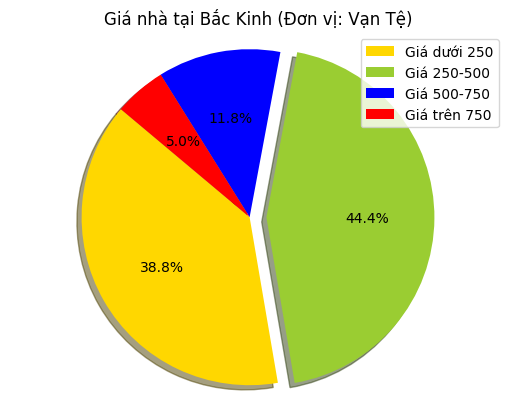

In [ ]:
gia_250 = df[df.totalPrice < 251]
nha_250 = gia_250.totalPrice.count()
print(nha_250)

gia_500 = df[df.totalPrice > 250]
gia_500 = gia_500[df[df.totalPrice > 250].totalPrice < 501]
nha_500 = gia_500.totalPrice.count()
print(nha_500)

gia_1000 = df[df.totalPrice > 500]
gia_1000 = gia_1000[df[df.totalPrice > 500].totalPrice < 751]
nha_1000 = gia_1000.totalPrice.count()
print(nha_1000)

gia_cao = df[df.totalPrice > 750]
nha_cao = gia_cao.totalPrice.count()
print(nha_cao)

lst_gianha = [nha_250,nha_500,nha_1000,nha_cao]
lst_nha =['Giá dưới 250','Giá 250-500','Giá 500-750','Giá trên 750']
colors = ['gold', 'yellowgreen', 'blue', 'red']
explode = []
for i in lst_gianha:
    if i == max(lst_gianha):
        explode.append(0.1)
    else:
        explode.append(0)

plt.pie(lst_gianha,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(lst_nha)
plt.title("Giá nhà tại Bắc Kinh (Đơn vị: Vạn Tệ)")
plt.show()


In [ ]:
df.bathRoom.value_counts()

1    261488
2     52606
3      3239
0       915
4       487
5        67
6         9
7         3
Name: bathRoom, dtype: int64

In [ ]:
phong_1 = df[df.bathRoom == '1' ]
phong_1 = phong_1.bathRoom.count()

print(phong_1)

phong_2 = df[df.bathRoom == '2' ]
phong_2 = phong_2.bathRoom.count()

phong_3 = df[df.bathRoom == '3' ]
phong_3 = phong_3.bathRoom.count()

phong =df.bathRoom.count()
phong_khac = phong - phong_1 - phong_2 - phong_3

print(phong_khac)

lst_phong_bath =[phong_1, phong_2, phong_3, phong_khac]

261488
1481


In [ ]:
df.kitchen.value_counts()

1    315283
0      2680
2       828
3        22
4         1
Name: kitchen, dtype: int64

In [ ]:
phong_1 = df[df.kitchen == 1 ]
phong_1 = phong_1.kitchen.count()


phong_2 = df[df.kitchen == 2 ]
phong_2 = phong_2.kitchen.count()

phong_3 = df[df.kitchen == 3 ]
phong_3 = phong_3.kitchen.count()

phong_khac = df[df.kitchen == 0]
phong_khac = phong_khac.kitchen.count()

lst_phong_k = [phong_1, phong_2, phong_3, phong_khac]

Text(0.5, 1.0, ' Thống kê số lượng phòng của BĐS tại Bắc Kinh')

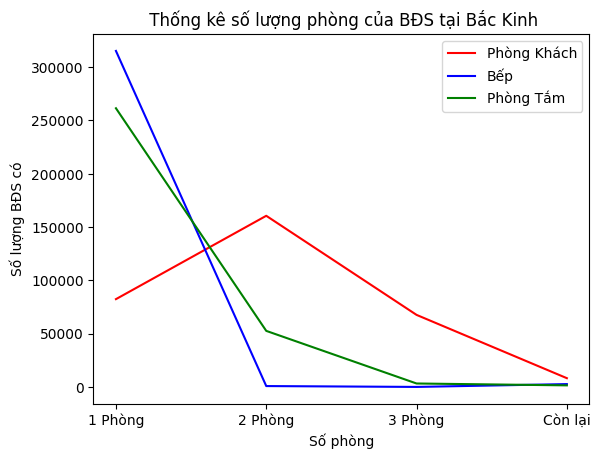

In [ ]:
phong_1 = df[df.livingRoom == '1' ]
phong_1 = phong_1.livingRoom.count()

phong_2 = df[df.livingRoom == '2']
phong_2 = phong_2.livingRoom.count()

phong_3 = df[df.livingRoom == '3' ]
phong_3 = phong_3.livingRoom.count()

phong =df.bathRoom.count()
phong_khac = phong - phong_1 - phong_2 - phong_3

lst_phong =[phong_1, phong_2, phong_3, phong_khac]


lst_label_phong = ['1 Phòng','2 Phòng','3 Phòng','Còn lại']

plt.plot(lst_label_phong,lst_phong, label ="Phòng Khách", color ='r')
plt.plot(lst_label_phong,lst_phong_k , label = "Bếp", color = 'b')
plt.plot(lst_label_phong,lst_phong_bath, label = "Phòng Tắm",color ='g')
plt.legend()
plt.xlabel('Số phòng')
plt.ylabel('Số lượng BĐS có')
plt.title(' Thống kê số lượng phòng của BĐS tại Bắc Kinh')


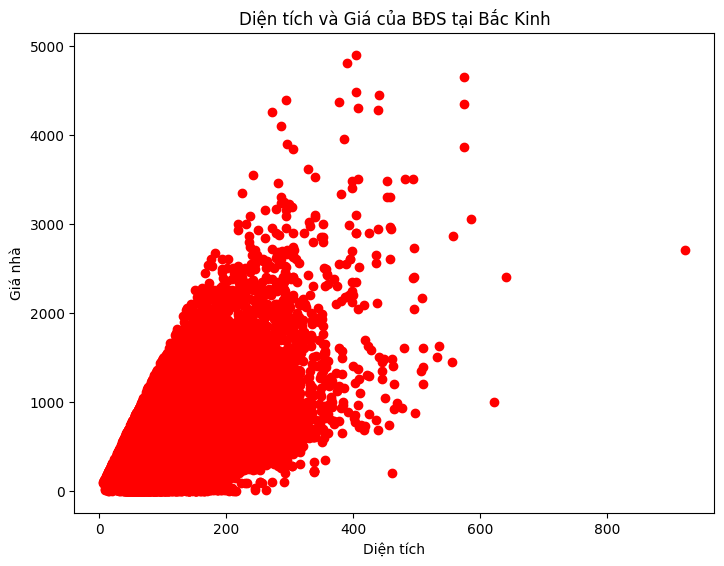

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
total_price = df.totalPrice
square = df.square
ax.scatter(square, total_price , color='r')
ax.set_xlabel('Diện tích')
ax.set_ylabel('Giá nhà')
ax.set_title('Diện tích và Giá của BĐS tại Bắc Kinh')
plt.show()


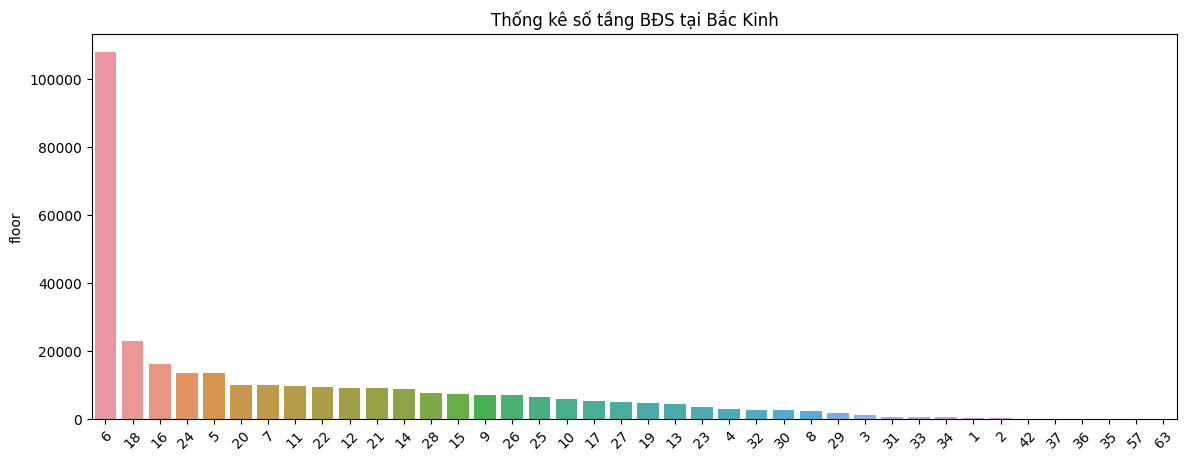

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x=floor_col.value_counts().index, y=floor_col.value_counts()).set_title('Thống kê số tầng BĐS tại Bắc Kinh')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['totalPrice'].describe()

count    318814.000000
mean        348.909805
std         227.152425
min           0.100000
25%         205.000000
50%         294.000000
75%         425.500000
max        4900.000000
Name: totalPrice, dtype: float64

# Train du lieu

# pip install --upgrade scikit-learn


In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
df.fillna(0)
df.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [ ]:
#lấy những columns cần thiết để training

train = ['square','livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime','district']
# livingRoom','drawingRoom','kitchen','bathRoom','floor','constructionTime

In [ ]:
x = df[train]
print(x.head())
y = df['totalPrice']
pd.isna(df[train]).any()


   square livingRoom drawingRoom  kitchen bathRoom floor constructionTime  \
0  131.00          2           1        1        1    26             2005   
1  132.38          2           2        1        2    22             2004   
2  198.00          3           2        1        3     4             2005   
3  134.00          3           1        1        1    21             2008   
4   81.00          2           1        1        1     6             1960   

   district  
0         7  
1         7  
2         7  
3         6  
4         1  


square              False
livingRoom          False
drawingRoom         False
kitchen             False
bathRoom            False
floor               False
constructionTime    False
district            False
dtype: bool

In [ ]:
#Đưa dữ liệu vào train (80% train, 20% test)

x_train, x_valid,y_train, y_valid = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state = 27)

In [ ]:
x_train

,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,district
171804,57.46,2,1,1,1,14,2000,7
4642,86.71,2,1,1,2,25,2009,7
18314,69.68,2,1,1,1,6,1999,7
73882,45.04,1,1,1,1,14,1994,7
220610,36.13,1,0,0,0,6,2004,2
...,...,...,...,...,...,...,...,...
267029,57.00,2,1,1,1,6,1989,8
196436,77.80,3,1,1,1,12,2003,1
14879,87.20,2,1,1,1,20,2008,6
36681,51.99,2,2,1,1,5,1977,7


In [ ]:
x.shape
#kiểm tra x_train đủ 70%

(318814, 8)

In [ ]:
y_train

171804    195.0
4642      560.0
18314     490.0
73882     320.0
220610     24.6
          ...  
267029    400.0
196436    395.0
14879     380.0
36681     232.0
267320    365.0
Name: totalPrice, Length: 255051, dtype: float64

In [ ]:
dt_model = DecisionTreeRegressor(random_state=27)



In [ ]:

dt_model.fit(x_train, y_train)




DecisionTreeRegressor(random_state=27)

In [ ]:
y_predicts = dt_model.predict(x_valid)

In [ ]:
sosanh = pd.DataFrame({'y': y_valid, 'y_predicts': y_predicts})
sosanh

,y,y_predicts
169973,136.0,134.000000
185541,363.0,189.750000
184564,325.0,218.000000
303669,213.8,288.000000
169494,221.0,241.000000
...,...,...
248861,250.0,286.666667
256651,450.0,430.000000
106635,237.0,175.000000
19791,648.0,680.000000


In [ ]:
#Độ chính xác của dự đoán so với dữ liệu

from sklearn.metrics import r2_score
print('Độ chính xác của DecsionTreeRegressor:',r2_score(y_valid,y_predicts))



Độ chính xác của DecsionTreeRegressor: 0.4420555413605103


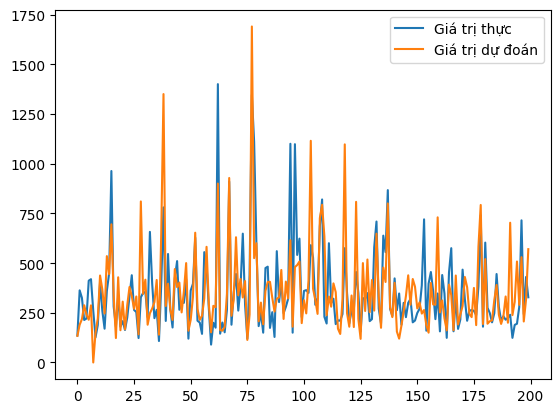

In [ ]:
lst=[]
for i in range (200):
  lst.append(i)
#Trực quan hóa dữ liệu bằng mô hình Line
plt.plot(lst,y_valid.head(200), label='Giá trị thực')
plt.plot(lst,y_predicts[:200], label='Giá trị dự đoán')
plt.legend()
plt.show()

# Train voi mo hinh ramdomFoestR


# pip install --upgrade numpy scipy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train,y_train)



RandomForestRegressor(random_state=1)

In [ ]:


y_rf_predict = rf_model.predict(x_valid)



In [ ]:
sosanh_rf = pd.DataFrame({'y': y_valid, 'y_predicts': y_rf_predict})
sosanh_rf

,y,y_predicts
169973,136.0,133.058214
185541,363.0,201.662917
184564,325.0,260.956952
303669,213.8,295.919000
169494,221.0,264.464095
...,...,...
248861,250.0,285.399401
256651,450.0,496.535000
106635,237.0,265.037667
19791,648.0,614.343690


In [ ]:
print('Độ chính xác của RandomForestRegression:',r2_score(y_valid,y_rf_predict))

Độ chính xác của RandomForestRegression: 0.6087307742979273


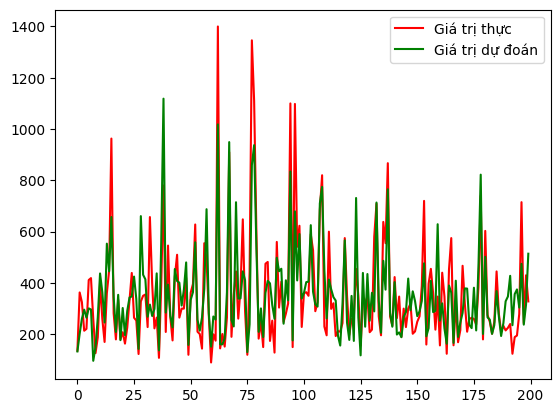

In [ ]:
y_rf_predict.shape
lst=[]
for i in range (200):
  lst.append(i)
#Trực quan hóa dữ liệu bằng mô hình Line
plt.plot(lst,y_valid.head(200), label='Giá trị thực',color='r')
plt.plot(lst,y_rf_predict[:200], label='Giá trị dự đoán',color='g')
plt.legend()
plt.show()

# du doan gia nha tu du lieu them vao

In [ ]:
#Dự đoán với input dữ liệu mới

x_valid.head()

,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,district
169973,37.88,1,0,1,1,11,2007,7
185541,61.90,2,1,1,1,6,1993,7
184564,87.66,2,2,1,1,15,2010,7
303669,63.50,2,1,1,1,16,1988,10
169494,53.03,1,0,1,1,30,2002,7


In [ ]:
# voi mo hinh rf
y_tam = rf_model.predict([[50, 2, 1, 1, 1,3,2005, 3]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print('Kết quả dự đoán giá nhà:', y_tam)



Kết quả dự đoán giá nhà: [206.35271429]


# Train voi Parameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# conda install tensorflow


# DTR

In [ ]:
parameters = {
    'max_depth' : [4,5,6,7,None],
    'min_samples_split' : [2,5,8,10,15],
    'min_samples_leaf' : [1,2,3,4],
}

In [ ]:
grid_dtree = GridSearchCV(estimator = dt_model, param_grid = parameters,scoring='neg_root_mean_squared_error',cv=4,n_jobs=-1)




In [ ]:
grid_dtree.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 8, 10, 15]},
             scoring='neg_root_mean_squared_error')

RMSE :  111.58876543667233
R2 Score :  0.7568224688399394


<ipython-input-43-095583c5ef07>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-predictions_train),ax = axes[1])


<Axes: xlabel='totalPrice', ylabel='Density'>

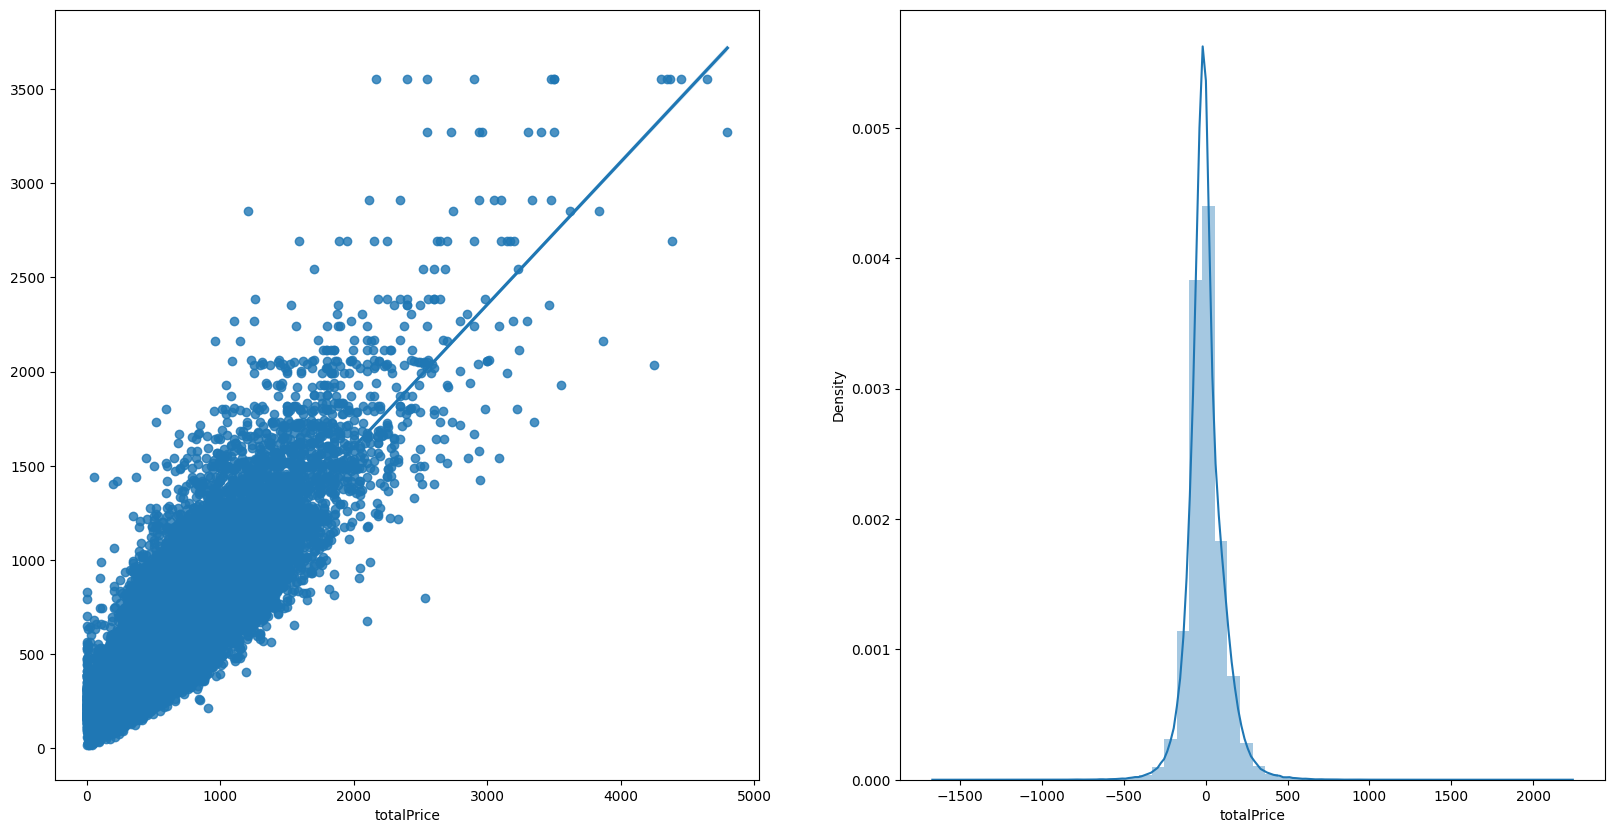

In [ ]:
#ta train
predictions_train = grid_dtree.predict(x_train)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))
print('R2 Score : ', r2_score(y_train,predictions_train))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_train, y = predictions_train,ax = axes[0])
sns.distplot((y_train-predictions_train),ax = axes[1])


RMSE :  152.25931725099733
R2 Score :  0.5639663197232574


<ipython-input-44-342c49e4cd42>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_valid-predictions_test),ax = axes[1])


<Axes: xlabel='totalPrice', ylabel='Density'>

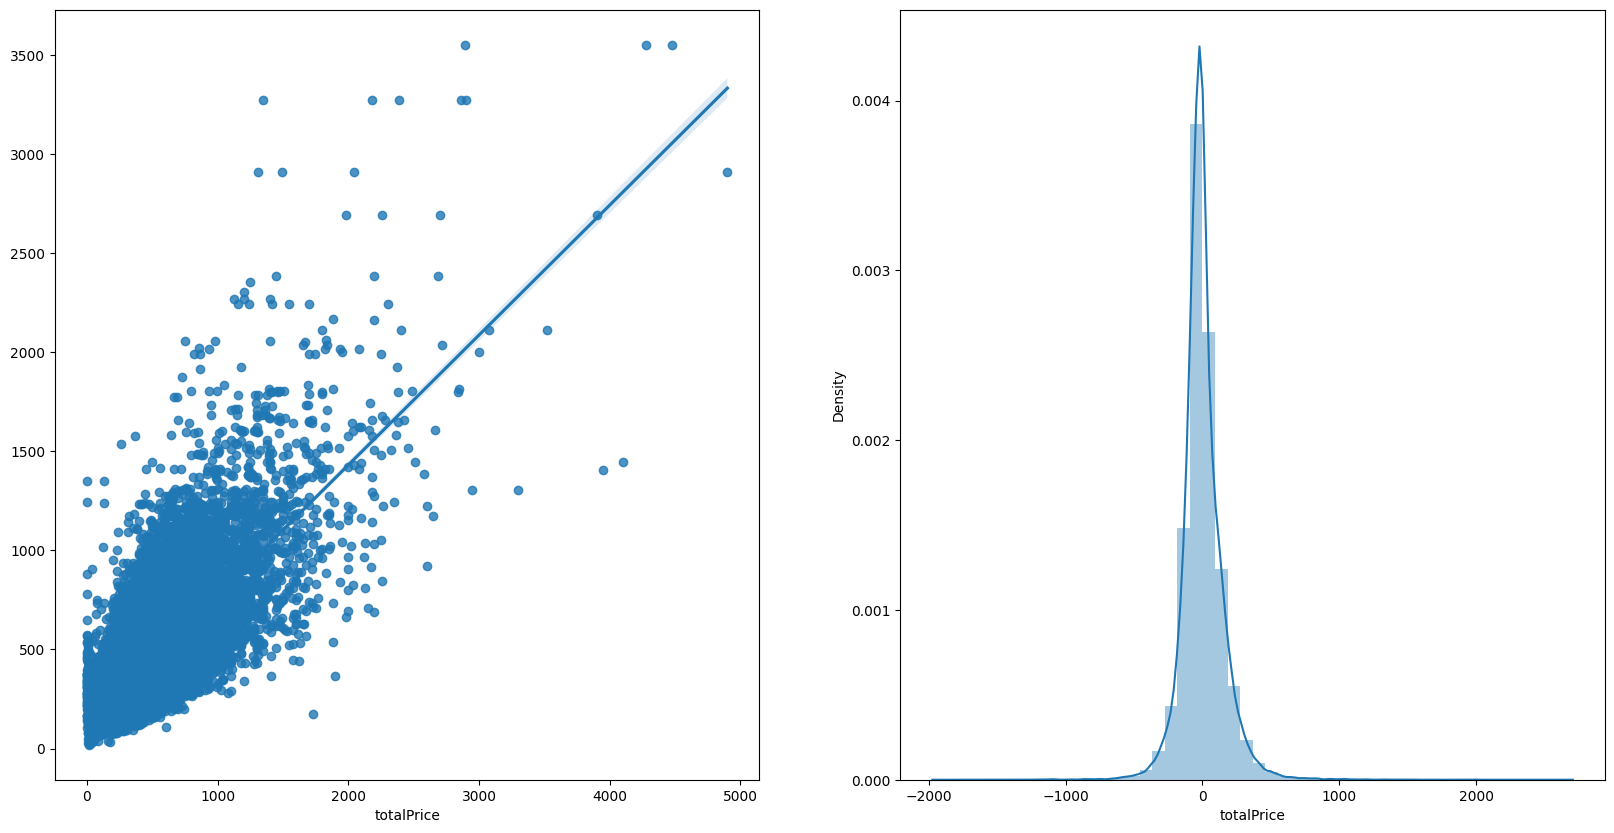

In [ ]:
# tap test
predictions_test = grid_dtree.predict(x_valid)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_valid,predictions_test)))
print('R2 Score : ', r2_score(y_valid,predictions_test))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_valid, y = predictions_test,ax = axes[0])
sns.distplot((y_valid-predictions_test),ax = axes[1])

In [ ]:
print('Tap Train MAE:', metrics.mean_absolute_error(y_train,predictions_train))

print('Tap test MAE:', metrics.mean_absolute_error(y_valid,predictions_test))


Tap Train MAE: 77.52255870874757
Tap test MAE: 103.15230768067833


# RDF

In [ ]:
parameters = {
    'max_depth' : [5,6,None],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [1,2],
    'n_estimators' : [100]
}

In [ ]:
grid_rfc = GridSearchCV(estimator = rf_model,
                        param_grid = parameters,
                        scoring='neg_root_mean_squared_error',cv=4,n_jobs=-1
                       )

In [ ]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 6, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [100]},
             scoring='neg_root_mean_squared_error')

RMSE :  91.45678384268659
R2 Score :  0.8366518014280577


<ipython-input-49-3ec6ce3dd968>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-predictions_train),ax = axes[1])


<Axes: xlabel='totalPrice', ylabel='Density'>

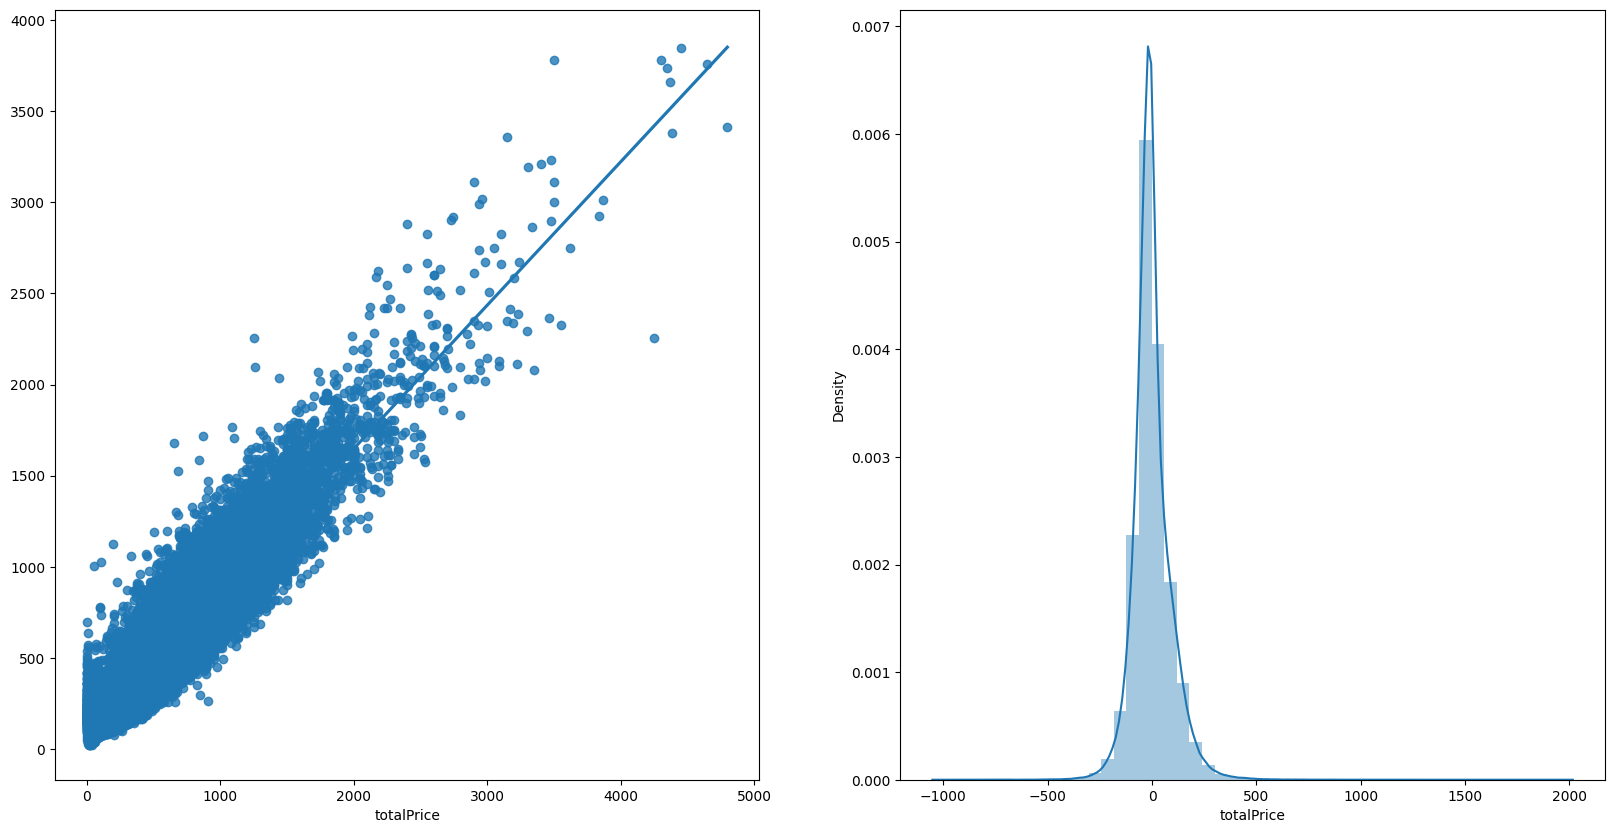

In [ ]:
# Prediction with data train
predictions_train = grid_rfc.predict(x_train)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))
print('R2 Score : ', r2_score(y_train,predictions_train))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_train, y = predictions_train,ax = axes[0])
sns.distplot((y_train-predictions_train),ax = axes[1])

RMSE :  141.25299386509812
R2 Score :  0.6247267543173267


<ipython-input-50-7028b5eb5a0d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_valid-predictions_test),ax = axes[1])


<Axes: xlabel='totalPrice', ylabel='Density'>

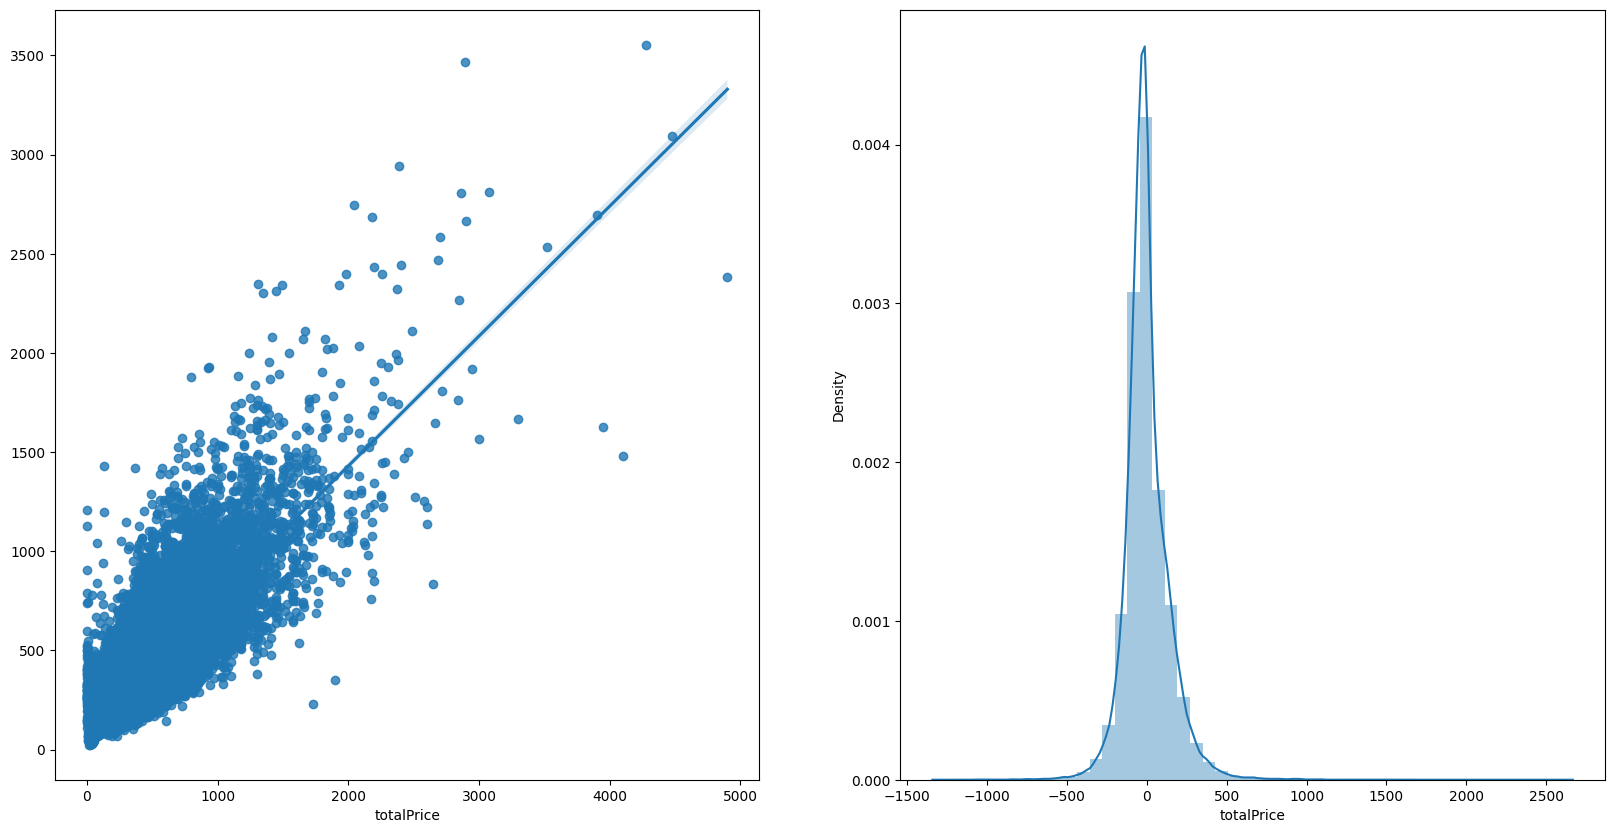

In [ ]:
# tap test
predictions_test = grid_rfc.predict(x_valid)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_valid,predictions_test)))
print('R2 Score : ', r2_score(y_valid,predictions_test))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_valid, y = predictions_test,ax = axes[0])
sns.distplot((y_valid-predictions_test),ax = axes[1])

In [ ]:
print('Tap Train MAE:', metrics.mean_absolute_error(y_train,predictions_train))

print('Tap test MAE:', metrics.mean_absolute_error(y_valid,predictions_test))


Tap Train MAE: 64.76437689604592
Tap test MAE: 97.05802865104039


# su dung Bagging

In [ ]:
# Xây dựng mô hình RandomForestRegressor với Bagging
rf_bg_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=27)

# Huấn luyện mô hình
rf_bg_model.fit(x_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
score = rf_bg_model.score(x_valid, y_valid)
print("R-squared score:", score)

R-squared score: 0.6075909279616729


In [ ]:
# Xây dựng mô hình DecisionTreeRegressor
dt_bg_model = DecisionTreeRegressor(max_depth=50,min_samples_leaf=10, random_state=27)

# Huấn luyện mô hình
dt_bg_model.fit(x_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
score = dt_bg_model.score(x_valid, y_valid)
print("R-squared score:", score)

R-squared score: 0.5836073126682764
